In [1]:
from pathlib import Path
import imghdr
import os

data_dir = "hair_types"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
image_size = (64, 64)
batch_size = 32
#Set seed of python, numpy, tf to 42
keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size, 
    labels='inferred',
    label_mode='categorical'
)

2023-11-21 19:18:51.450378: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 19:18:51.450436: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 19:18:51.450461: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 19:18:51.458346: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 981 files belonging to 3 classes.
Using 785 files for training.


2023-11-21 19:18:55.084804: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-21 19:18:55.090273: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-21 19:18:55.090327: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-21 19:18:55.092070: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-21 19:18:55.092144: I tensorflow/compile

Found 981 files belonging to 3 classes.
Using 196 files for validation.


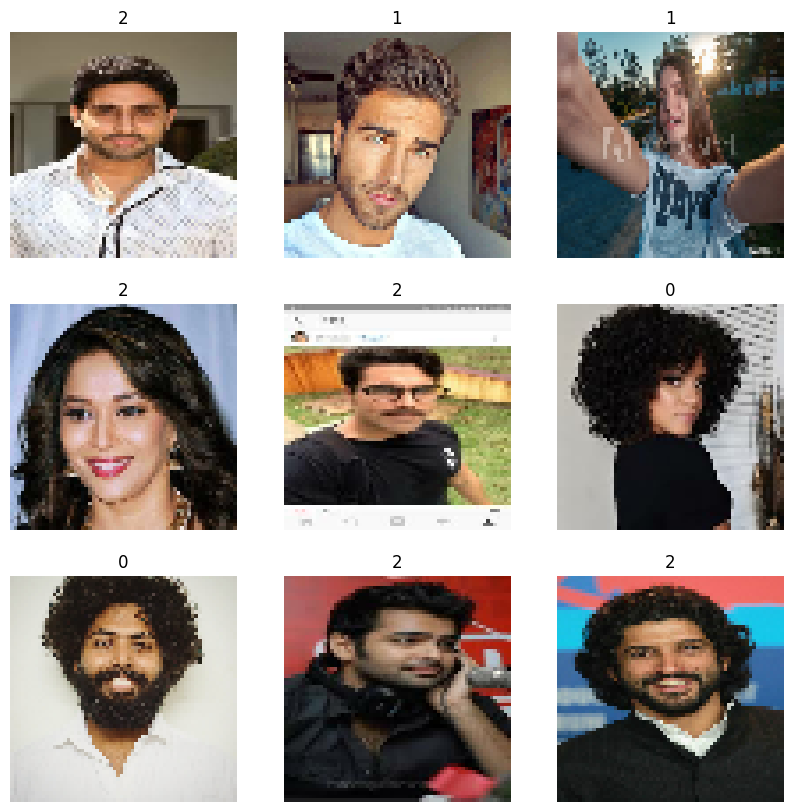

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(keras.Input(shape=image_size + (3,))) # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))

model.add(layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))
model.add(layers.Conv2D(filters=8, kernel_size=6, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))
model.add(layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))

In [5]:
import pydot
tf.keras.utils.plot_model(model, to_file='model_test.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [6]:
pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 activation (Activation)     (None, 62, 62, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 8)         4616      
                                                                 
 activation_1 (Activation)   (None, 57, 57, 8)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 16)        1168      
                                                                 
 activation_2 (Activation)   (None, 55, 55, 16)        0

In [8]:
epochs = 50

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/50


2023-11-21 19:19:03.800737: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-21 19:19:04.566149: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x8386a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-21 19:19:04.566194: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2023-11-21 19:19:04.572171: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-21 19:19:04.756764: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 [==============================] - 6s 89ms/step - loss: 1.0988 - accuracy: 0.3452 - val_loss: 1.1003 - val_accuracy: 0.2857
Epoch 2/50
25/25 [==============================] - 3s 73ms/step - loss: 1.0974 - accuracy: 0.3516 - val_loss: 1.1005 - val_accuracy: 0.2857
Epoch 3/50
25/25 [==============================] - 3s 82ms/step - loss: 1.0949 - accuracy: 0.3516 - val_loss: 1.0964 - val_accuracy: 0.2857
Epoch 4/50
25/25 [==============================] - 2s 69ms/step - loss: 1.0923 - accuracy: 0.3656 - val_loss: 1.0946 - val_accuracy: 0.3265
Epoch 5/50
25/25 [==============================] - 3s 72ms/step - loss: 1.0831 - accuracy: 0.3732 - val_loss: 1.0825 - val_accuracy: 0.3367
Epoch 6/50
25/25 [==============================] - 2s 68ms/step - loss: 1.0657 - accuracy: 0.4204 - val_loss: 1.0921 - val_accuracy: 0.3061
Epoch 7/50
25/25 [==============================] - 2s 71ms/step - loss: 1.0504 - accuracy: 0.4459 - val_loss: 1.0526 - val_accuracy: 0.4082
Epoch 8/50
25/25 [======

In [9]:
img = keras.preprocessing.image.load_img(
    "hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(
    "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions[0])
)

1/1 [==============================] - 0s 98ms/step
This image is 0.98 percent curly hair, 0.02 percent straight hair, and 0.00 percent wavy hair.


In [10]:
#model.save("my_model_3x3_6x6,3x3.keras")

In [11]:
reconstructed_model = keras.models.load_model("my_model.keras")
predictions = reconstructed_model.predict(img_array)
print(
    "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavy hair."
    % tuple(predictions[0])
)

1/1 [==============================] - 0s 200ms/step
This image is 0.84 percent curly hair, 0.14 percent straight hair, and 0.01 percent wavy hair.


In [12]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 49, 49, 4)         3076      
                                                                 
 activation (Activation)     (None, 49, 49, 4)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 8)         2056      
                                                                 
 activation_1 (Activation)   (None, 42, 42, 8)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 16)        2064      
                                                                 
 activation_2 (Activation)   (None, 39, 39, 16)        0